In [494]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [495]:
data1 = pd.read_csv("merged_2015")
data1 = data1.rename(columns={'Unnamed: 0': 'Year'})
data1 = data1.set_index('Year')
data1

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,,,,
2015,49450382.0,54.466667,23.725000,2.891667,10.435721,3.222155,10.976621,33700.0,180000.0,286000.0,225000.0
2016,49472094.0,56.375000,23.208333,4.283333,11.451568,3.222155,10.976621,34700.0,264000.0,270000.0,457000.0
2017,49833281.0,51.233333,21.691667,3.191667,11.480882,3.222155,10.976621,33700.0,264000.0,254000.0,523000.0
2018,51555695.0,46.550000,22.208333,1.958333,11.457786,3.222155,10.976621,32700.0,208500.0,1322000.0,392000.0
2019,52646698.0,44.442857,22.942857,6.114286,11.196704,3.412539,11.165615,21400.0,208500.0,1322000.0,375500.0
2020,39938321.0,55.420833,23.466667,3.587500,8.854768,3.384097,11.290680,34200.0,222000.0,278000.0,341000.0
2021,42798523.0,55.420833,23.466667,3.587500,8.221743,3.088371,11.663465,34200.0,222000.0,278000.0,341000.0


In [496]:
data2 = pd.read_csv("merged_no_health")
data2 = data2.rename(columns={'Unnamed: 0': 'Year'})
data2 = data2.set_index('Year')
data2

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,
2007,54834530.0,57.675000,26.100000,3.779167,34200.0,247000.0,130000.0,6.705000e+05
2008,55040271.0,57.016667,26.391667,4.066667,43300.0,265000.0,173500.0,7.915000e+05
2009,54216130.0,58.333333,25.808333,3.491667,51400.0,373000.0,262500.0,8.230000e+05
2010,51921676.0,58.633333,25.433333,3.933333,35200.0,168000.0,159000.0,4.965000e+05
2011,50247234.0,55.866667,27.641667,2.883333,32700.0,245000.0,1184000.0,1.007500e+06
2012,48965709.0,60.069231,26.669231,3.000000,33900.0,213000.0,884000.0,3.820000e+05
2013,49059691.0,58.218182,28.263636,3.190909,33200.0,204000.0,1760000.0,3.836667e+05
2014,49510592.0,56.675000,25.425000,3.058333,33200.0,360000.0,262000.0,5.466667e+05
2015,49450382.0,54.466667,23.725000,2.891667,33700.0,180000.0,286000.0,2.250000e+05


### Summary Statistic ??? Only this?

In [497]:
data1.describe()

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000
mean,4.795643e+07,51.987075,22.958503,3.659184,10.442739,3.253375,11.146606,32085.714286,224142.857143,5.728571e+05,379214.285714
std,4.724036e+06,4.761456,0.745460,1.299225,1.363133,0.110715,0.259436,4753.044137,30616.872099,5.118579e+05,94520.657858
min,3.993832e+07,44.442857,21.691667,1.958333,8.221743,3.088371,10.976621,21400.000000,180000.000000,2.540000e+05,225000.000000
25%,4.612445e+07,48.891667,22.575595,3.041667,9.645245,3.222155,10.976621,33200.000000,208500.000000,2.740000e+05,341000.000000
50%,4.947209e+07,54.466667,23.208333,3.587500,11.196704,3.222155,10.976621,33700.000000,222000.000000,2.780000e+05,375500.000000
75%,5.069449e+07,55.420833,23.466667,3.935417,11.454677,3.303126,11.228148,34200.000000,243000.000000,8.040000e+05,424500.000000
max,5.264670e+07,56.375000,23.725000,6.114286,11.480882,3.412539,11.663465,34700.000000,264000.000000,1.322000e+06,523000.000000


In [498]:
data2.describe()

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
count,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01
mean,4.996606e+07,55.589512,25.362795,3.468907,34693.333333,241133.333333,7.275333e+05,5.226333e+05
std,4.102398e+06,4.655961,2.114286,0.930075,6256.564172,58978.648275,5.831639e+05,2.122186e+05
min,3.993832e+07,44.442857,21.691667,1.958333,21400.000000,168000.000000,1.300000e+05,2.250000e+05
25%,4.925504e+07,55.166667,23.466667,3.029167,33200.000000,208500.000000,2.580000e+05,3.828333e+05
50%,4.983328e+07,57.016667,25.808333,3.190909,33700.000000,213000.000000,2.860000e+05,4.570000e+05
75%,5.228419e+07,58.483333,27.067832,3.856250,34450.000000,264000.000000,1.322000e+06,6.085833e+05
max,5.504027e+07,60.069231,28.263636,6.114286,51400.000000,373000.000000,1.760000e+06,1.007500e+06


### Simple Distribution plots

### Transformations

### Correlations and Covariances

Covariance Matrix for data1 

In [499]:
data1.cov()

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
all_motor_vehicles,2.231652e+13,-1.520946e+07,-1.720485e+06,876614.751474,5.807489e+06,47420.400239,-862400.323456,-1.106032e+10,-5.361503e+09,1.434843e+12,1.149138e+11
NO2 Air,-1.520946e+07,2.267146e+01,1.939715e+00,-1.429747,-3.443210e+00,-0.223268,0.335174,1.767544e+04,3.729005e+04,-2.258274e+06,-7.556344e+04
PM10 Air,-1.720485e+06,1.939715e+00,5.557112e-01,0.220760,-6.295555e-01,0.001888,0.084278,2.834354e+02,-1.076144e+04,-1.274958e+05,-5.488268e+04
SO2 Air,8.766148e+05,-1.429747e+00,2.207599e-01,1.687985,9.122582e-02,0.077566,0.065375,-4.657406e+03,4.771981e+03,1.312543e+05,1.238382e+04
Air pollution,5.807489e+06,-3.443210e+00,-6.295555e-01,0.091226,1.858131e+00,0.030586,-0.313617,-1.864078e+03,1.039765e+04,3.023010e+05,6.409324e+04
Cancer,4.742040e+04,-2.232683e-01,1.888465e-03,0.077566,3.058584e-02,0.012258,-0.007033,-3.291430e+02,-5.064167e+02,2.238704e+04,-2.972060e+02
Respiratory conditions,-8.624003e+05,3.351744e-01,8.427755e-02,0.065375,-3.136167e-01,-0.007033,0.067307,1.610945e+01,-8.502006e+02,-2.558997e+04,-6.491798e+03
Ammonia (NH3),-1.106032e+10,1.767544e+04,2.834354e+02,-4657.406463,-1.864078e+03,-329.142992,16.109451,2.259143e+07,4.096071e+07,-1.760219e+09,1.207857e+07
Sulphur oxides (SOX),-5.361503e+09,3.729005e+04,-1.076144e+04,4771.981293,1.039765e+04,-506.416706,-850.200635,4.096071e+07,9.373929e+08,-5.715143e+09,2.610089e+09
Methane (CH4),1.434843e+12,-2.258274e+06,-1.274958e+05,131254.308390,3.023010e+05,22387.037102,-25589.965009,-1.760219e+09,-5.715143e+09,2.619985e+11,6.939524e+08


Normalization data1 and correlation matrix, because the correlation matrix is equal to covariance matrix adding data normalization

In [500]:
data1Norm = (data1 - data1.mean()) / data1.std()
data1Norm
data2Norm = (data2 - data2.mean()) / data2.std()
data2Norm

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,
2007,1.186739,0.447918,0.348678,0.333586,-0.078851,0.099471,-1.024640,0.696766
2008,1.236890,0.306522,0.486628,0.642700,1.375622,0.404666,-0.950047,1.266932
2009,1.035998,0.589314,0.210728,0.024471,2.670262,2.235837,-0.797432,1.415364
2010,0.476702,0.653747,0.033363,0.499343,0.080982,-1.239997,-0.974912,-0.123143
2011,0.068540,0.059527,1.077844,-0.629598,-0.318599,0.065560,0.782742,2.284751
2012,-0.243844,0.962147,0.617909,-0.504160,-0.126800,-0.477009,0.268306,-0.662681
2013,-0.220935,0.564581,1.372019,-0.298898,-0.238683,-0.629606,1.770457,-0.654828
2014,-0.111024,0.233139,0.029421,-0.441441,-0.238683,2.015419,-0.798289,0.113248
2015,-0.125700,-0.241163,-0.774633,-0.620638,-0.158767,-1.036533,-0.757134,-1.402484


In [501]:
data1CovMatrix = data1Norm.cov()
#data1CovMatrix
#data1.corr()

data2CovMatrix = data2Norm.cov()
#data2CovMatrix

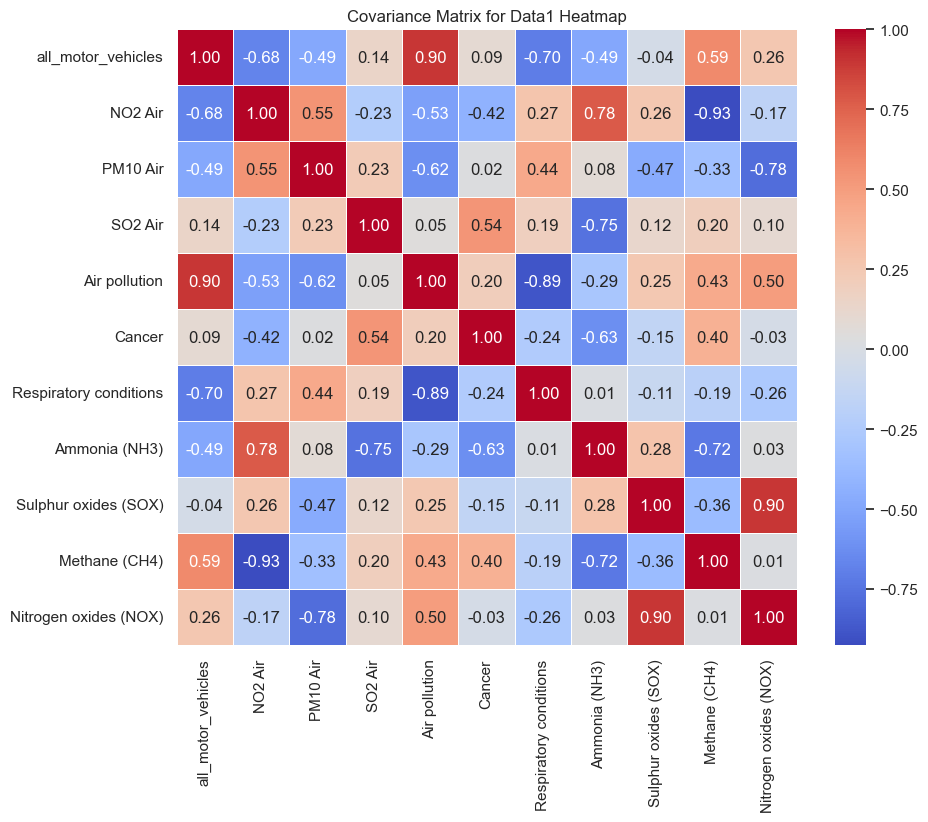

In [502]:
plt.figure(figsize=(10, 8))
sns.heatmap(data1CovMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix for Data1 Heatmap')
plt.show()

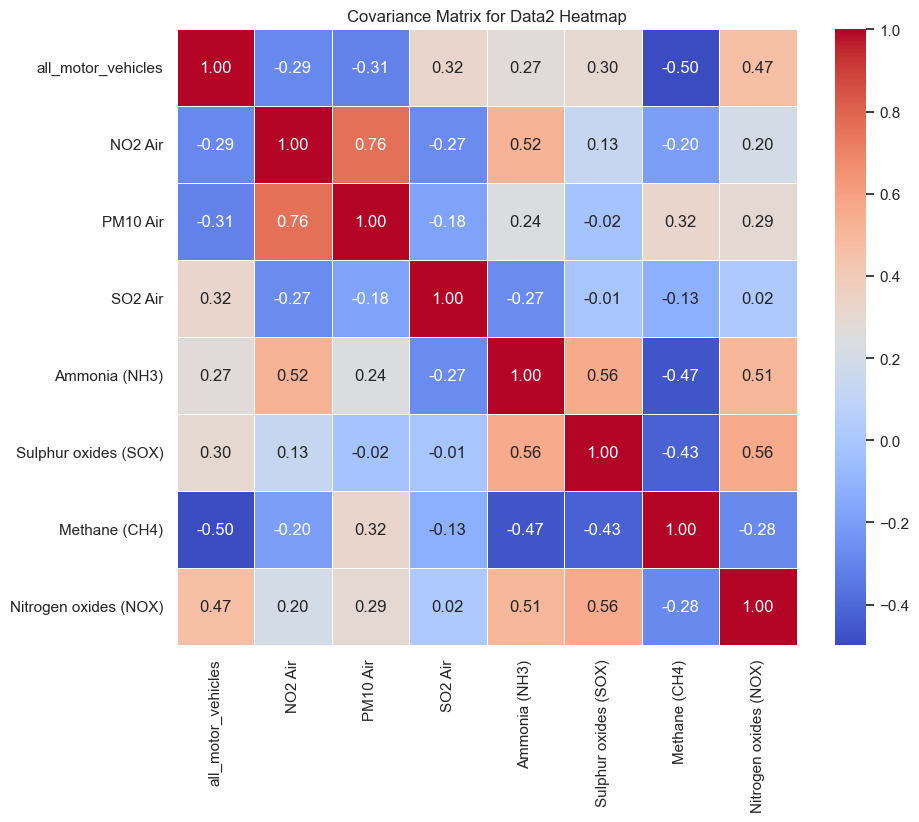

In [503]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2CovMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix for Data2 Heatmap')
plt.show()

## Multiple Relations

#### In this chapter we analyse the correlation matrix and make some plots with more linear and non linear correlated variables and see the evolution  

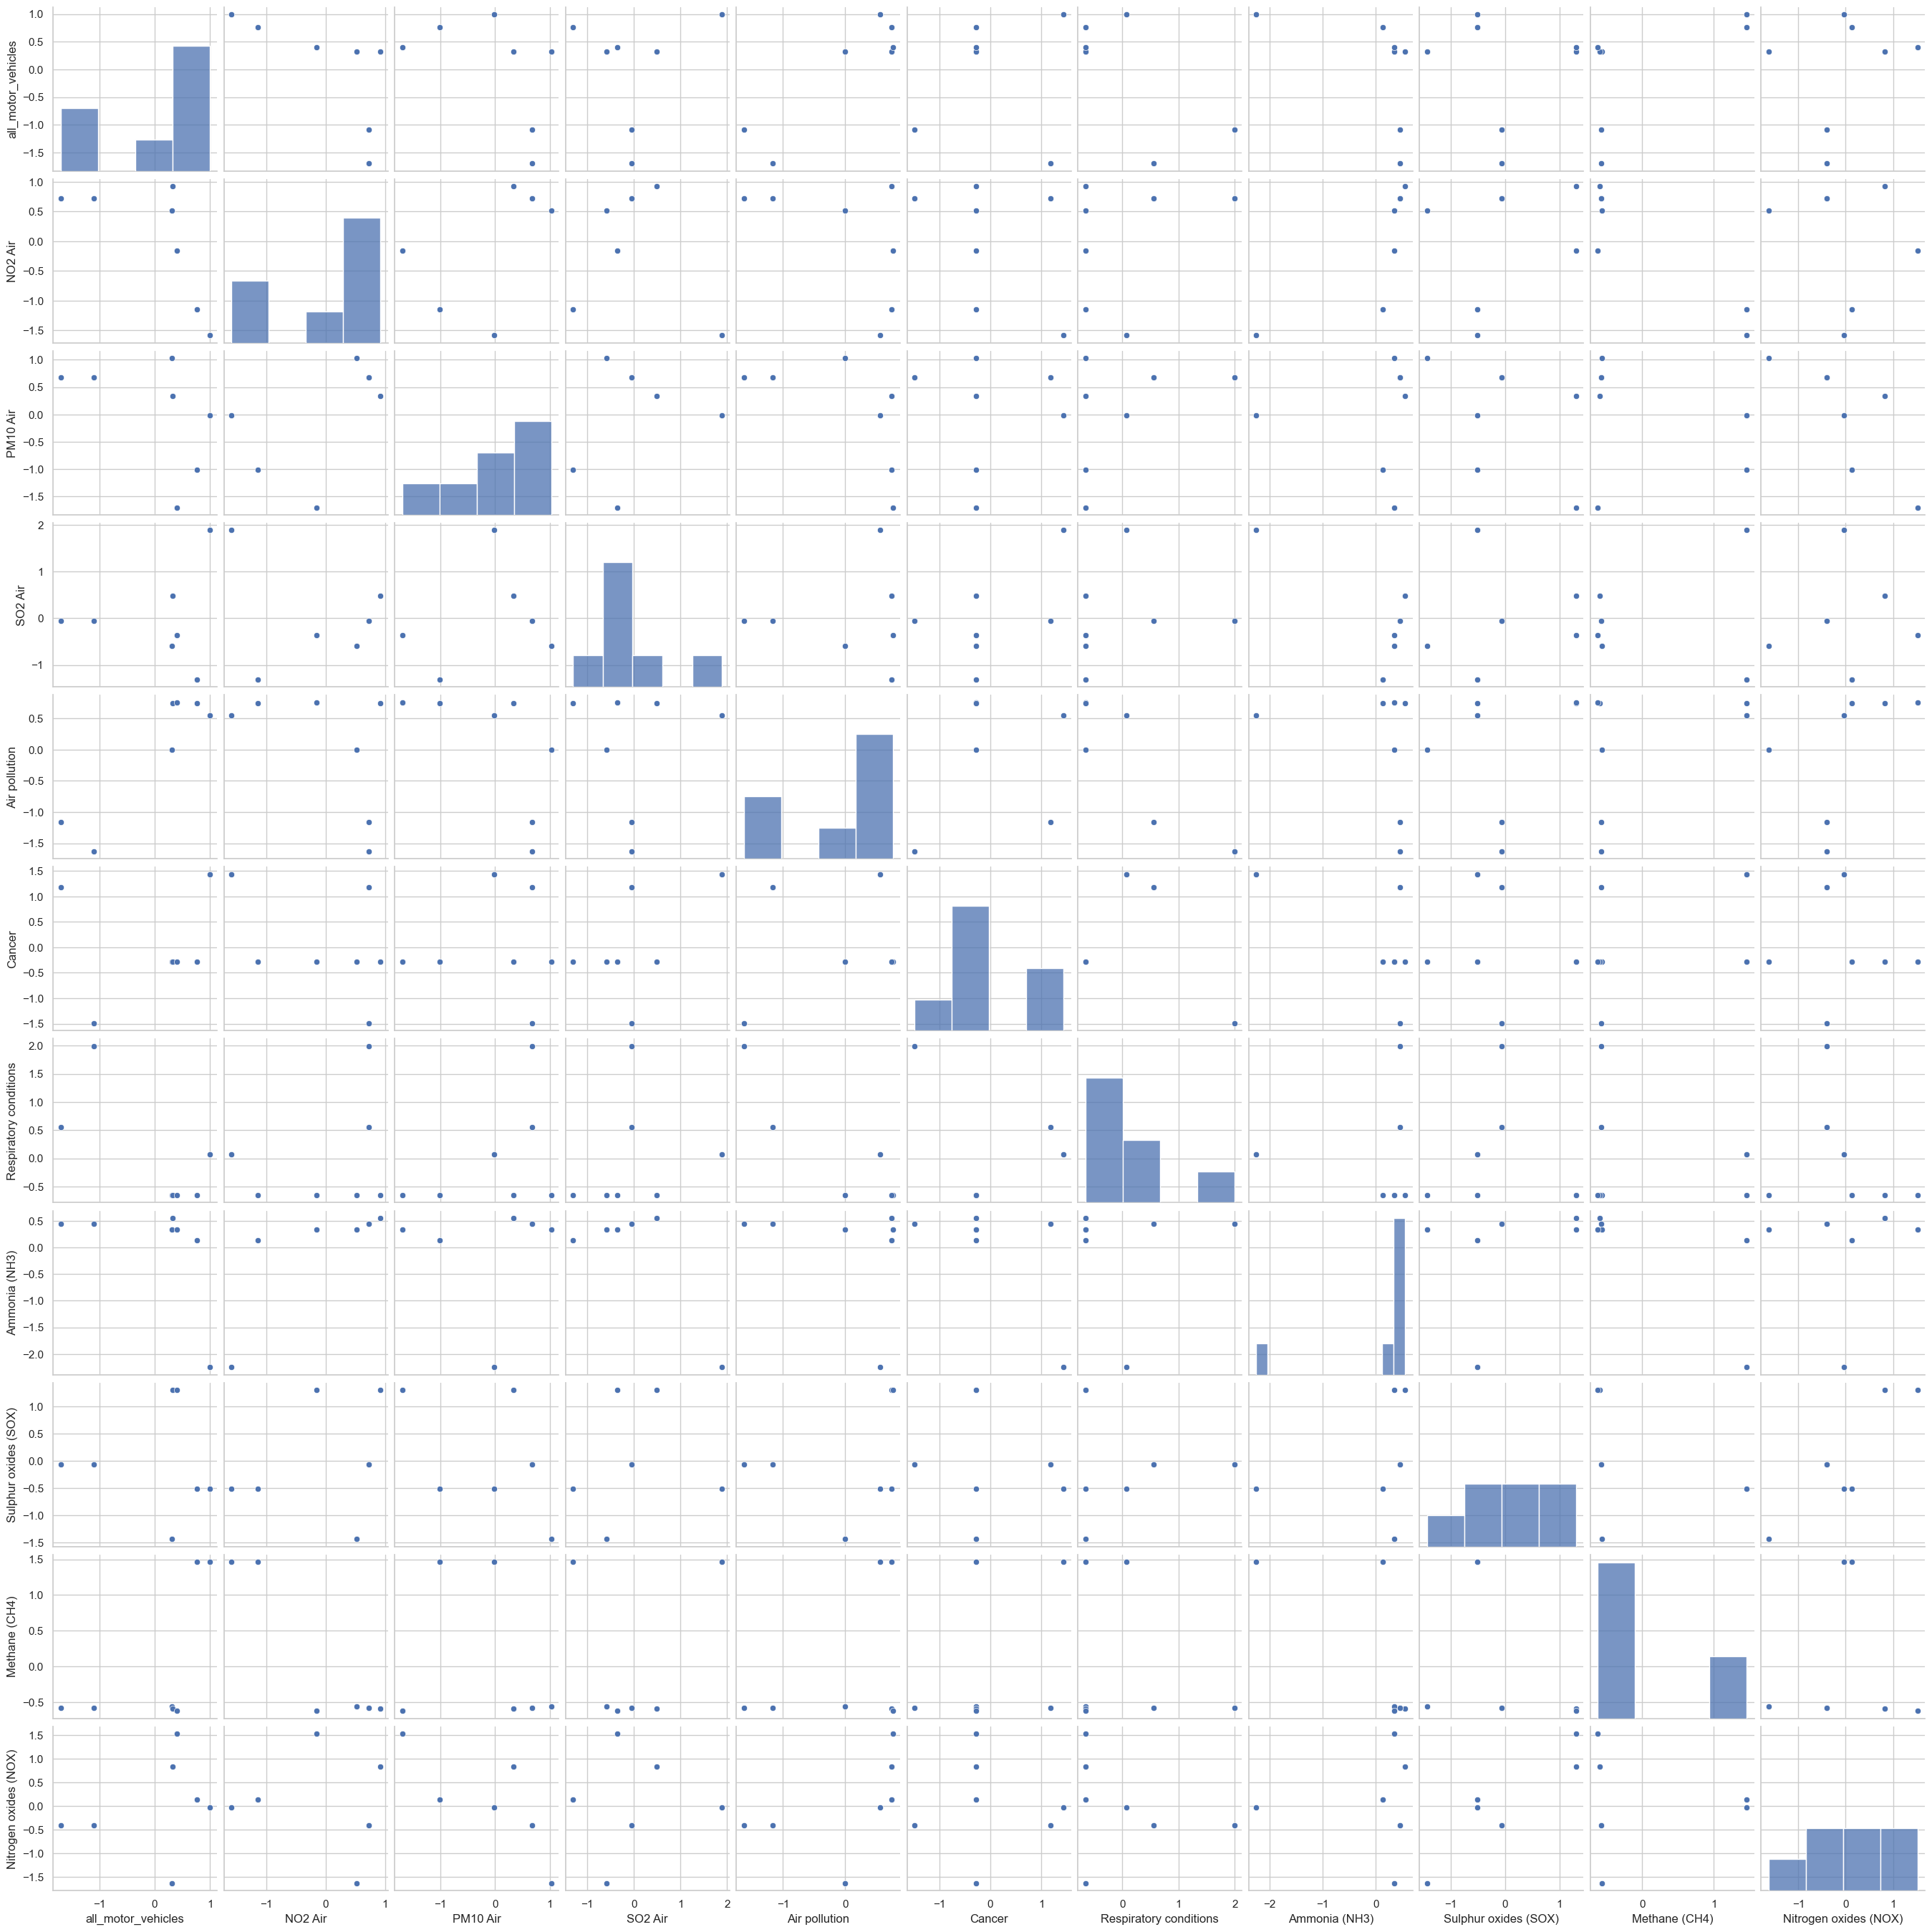

In [504]:
sns.pairplot(data1Norm)

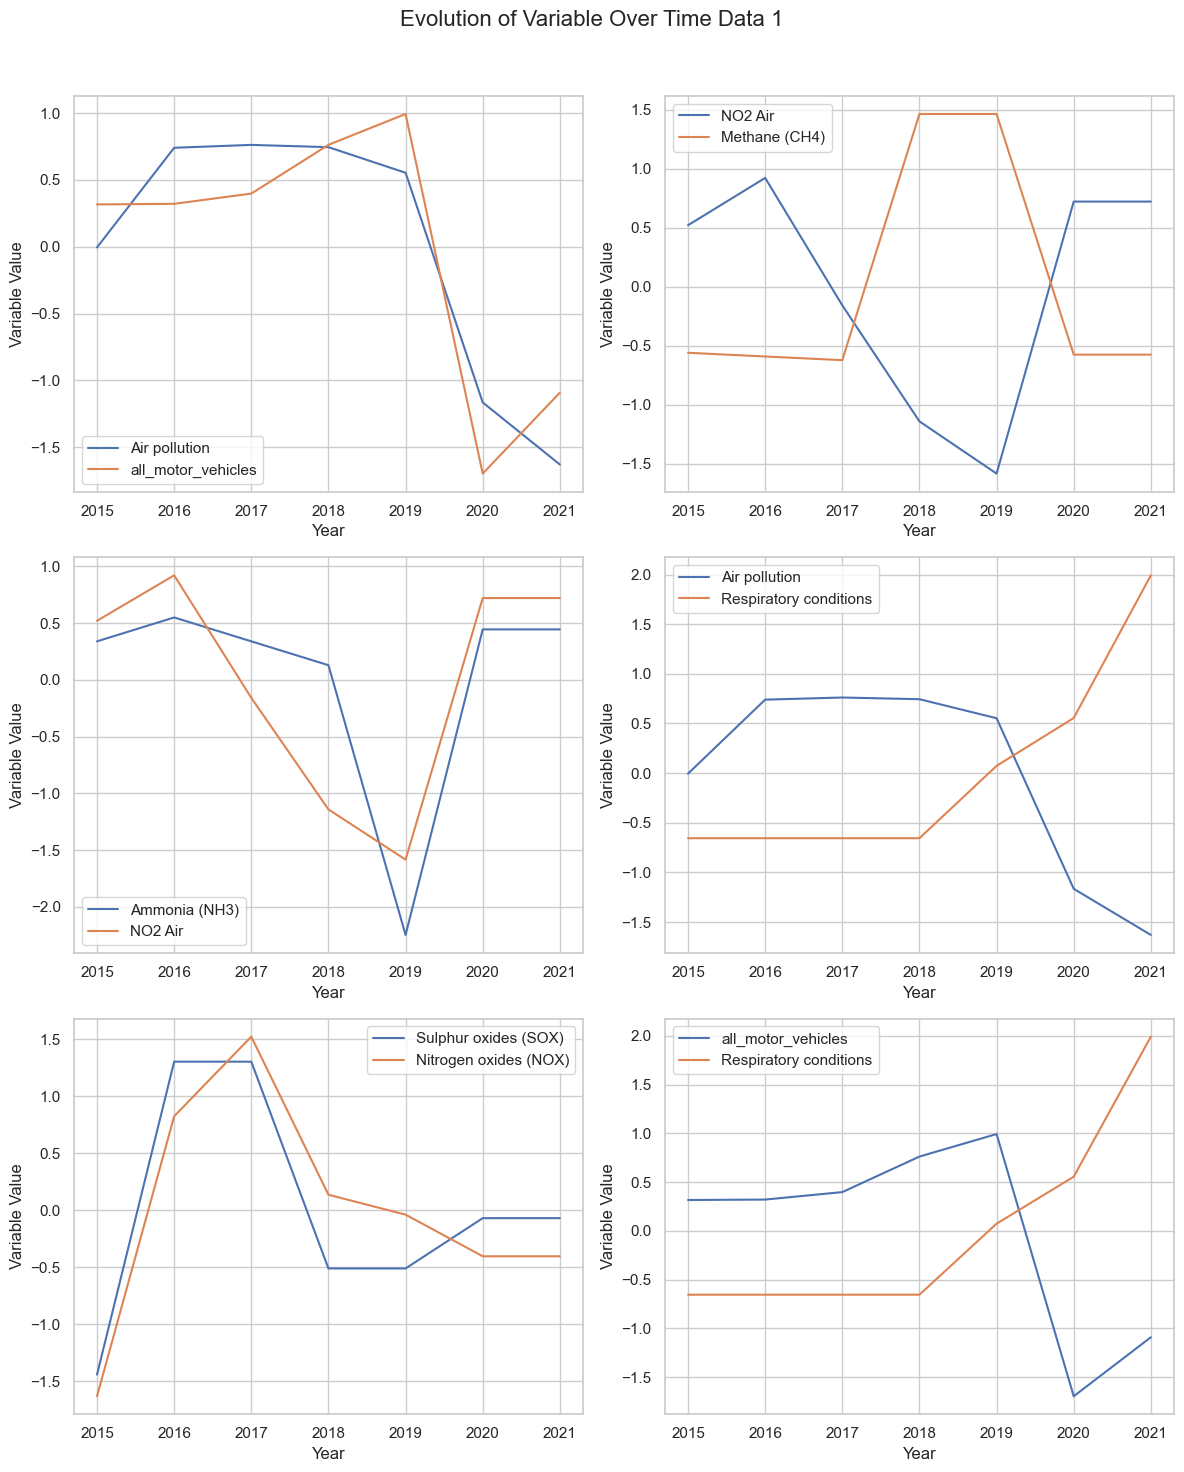

In [505]:
pairs_to_plot1 = [('Air pollution', 'all_motor_vehicles'), ('NO2 Air', 'Methane (CH4)'), ('Ammonia (NH3)', 'NO2 Air'), ('Air pollution', 'Respiratory conditions'),
                 ('Sulphur oxides (SOX)', 'Nitrogen oxides (NOX)'), ('all_motor_vehicles', 'Respiratory conditions')]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
fig.suptitle('Evolution of Variable Over Time Data 1', fontsize=16)

for i, (column1, column2) in enumerate(pairs_to_plot1):
    ax = axes[i//2, i%2]
    ax.plot(data1Norm.index, data1Norm[column1], label=column1)
    ax.plot(data1Norm.index, data1Norm[column2], label=column2)
    ax.set_xlabel('Year')
    ax.set_ylabel('Variable Value')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [506]:
#sns.pairplot(data2Norm)

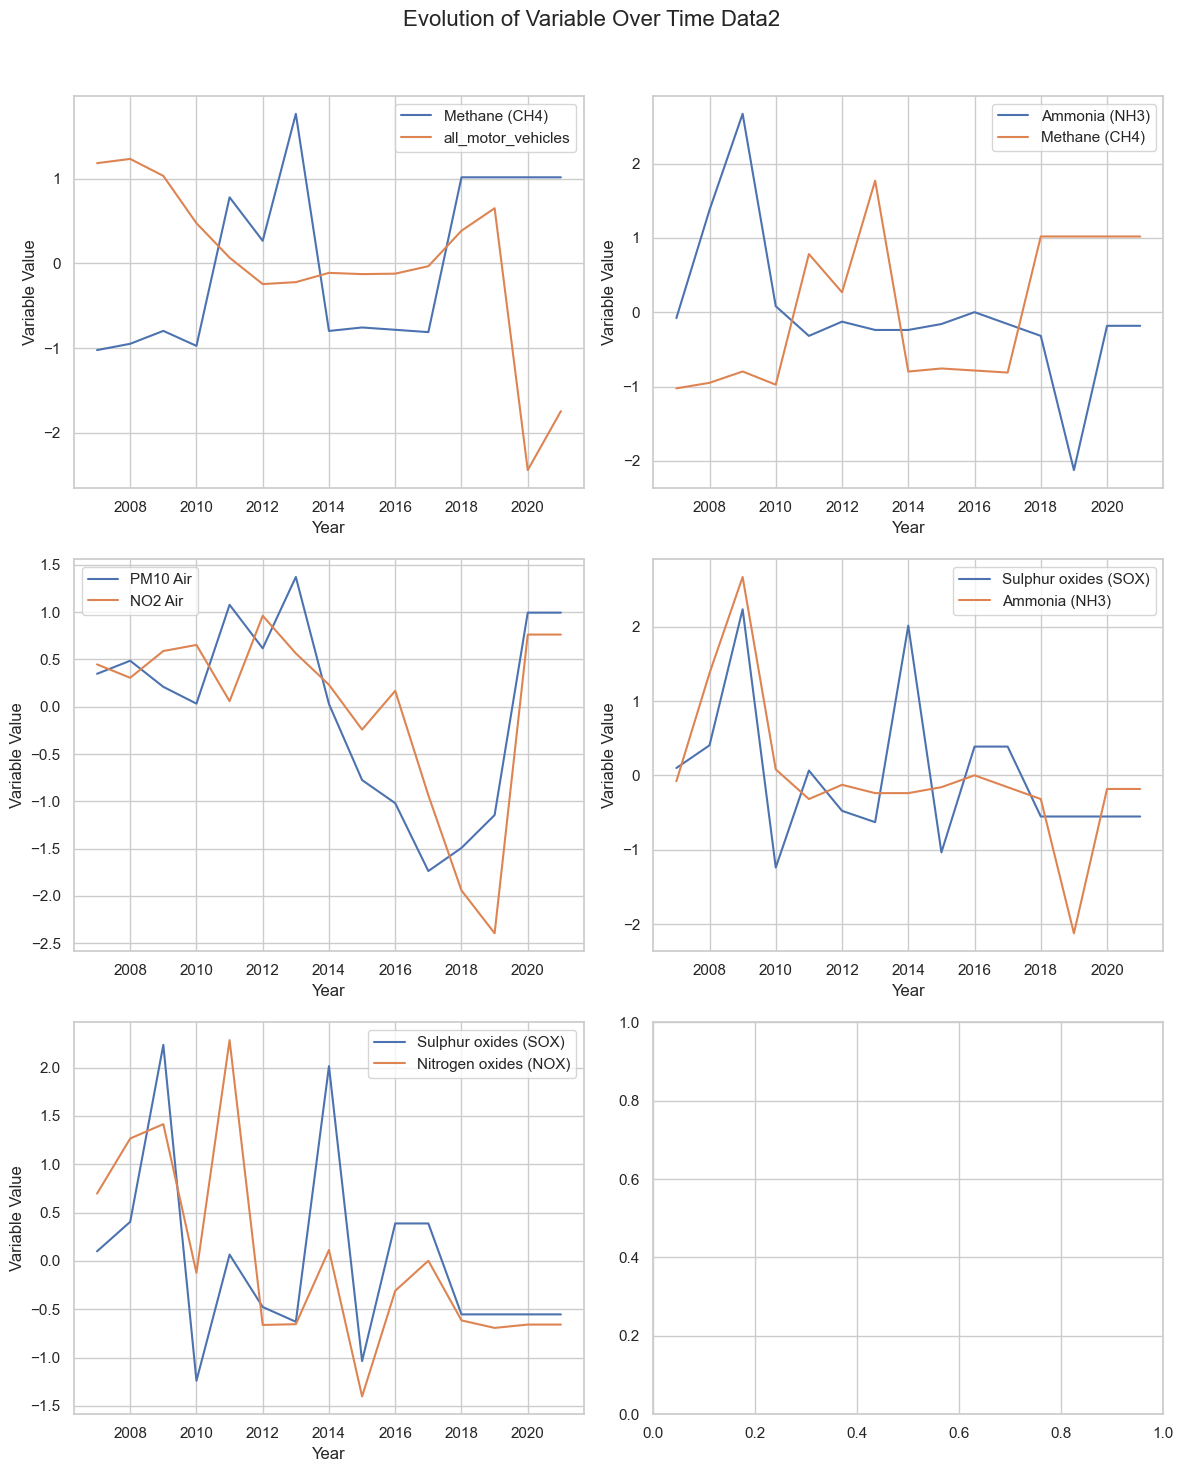

In [507]:
pairs_to_plot2 = [('Methane (CH4)', 'all_motor_vehicles'), ('Ammonia (NH3)', 'Methane (CH4)'), ('PM10 Air', 'NO2 Air'), 
                 ('Sulphur oxides (SOX)', 'Ammonia (NH3)'), ('Sulphur oxides (SOX)', 'Nitrogen oxides (NOX)')]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
fig.suptitle('Evolution of Variable Over Time Data2', fontsize=16)

for i, (column1, column2) in enumerate(pairs_to_plot2):
    ax = axes[i//2, i%2]
    ax.plot(data2Norm.index, data2Norm[column1], label=column1)
    ax.plot(data2Norm.index, data2Norm[column2], label=column2)
    ax.set_xlabel('Year')
    ax.set_ylabel('Variable Value')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Clustering

In [508]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data1Norm['Cluster'] = kmeans.fit_predict(data1Norm)

display(data1Norm)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX),Cluster
Year,,,,,,,,,,,,
2015,0.316245,0.520763,1.028219,-0.590750,-0.005148,-0.281991,-0.655211,0.339632,-1.441782,-0.560423,-1.631541,2
2016,0.320841,0.921551,0.335135,0.480402,0.740081,-0.281991,-0.655211,0.550023,1.301803,-0.591682,0.822949,0
2017,0.397299,-0.158301,-1.699402,-0.359843,0.761586,-0.281991,-0.655211,0.339632,1.301803,-0.622941,1.521209,0
2018,0.761905,-1.141893,-1.006318,-1.309127,0.744643,-0.281991,-0.655211,0.129240,-0.510923,1.463576,0.135269,0
2019,0.992852,-1.584435,-0.020989,1.889667,0.553112,1.437603,0.073270,-2.248183,-0.510923,1.463576,-0.039296,1
2020,-1.697300,0.721157,0.681677,-0.055174,-1.164942,1.180711,0.555334,0.444828,-0.069989,-0.576053,-0.404296,2
2021,-1.091843,0.721157,0.681677,-0.055174,-1.629332,-1.490350,1.992242,0.444828,-0.069989,-0.576053,-0.404296,2


In [509]:
from sklearn.metrics import silhouette_score
features_for_clustering = data1Norm.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering, data1Norm['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.20411507686845676


So with Silhouette coefficient we can conclude the clustering is not a good method to apply to our data.

DATA2 Clustering


In [510]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data2Norm['Cluster'] = kmeans.fit_predict(data2Norm)

display(data2Norm)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX),Cluster
Year,,,,,,,,,
2007,1.186739,0.447918,0.348678,0.333586,-0.078851,0.099471,-1.024640,0.696766,0
2008,1.236890,0.306522,0.486628,0.642700,1.375622,0.404666,-0.950047,1.266932,0
2009,1.035998,0.589314,0.210728,0.024471,2.670262,2.235837,-0.797432,1.415364,0
2010,0.476702,0.653747,0.033363,0.499343,0.080982,-1.239997,-0.974912,-0.123143,1
2011,0.068540,0.059527,1.077844,-0.629598,-0.318599,0.065560,0.782742,2.284751,0
2012,-0.243844,0.962147,0.617909,-0.504160,-0.126800,-0.477009,0.268306,-0.662681,2
2013,-0.220935,0.564581,1.372019,-0.298898,-0.238683,-0.629606,1.770457,-0.654828,2
2014,-0.111024,0.233139,0.029421,-0.441441,-0.238683,2.015419,-0.798289,0.113248,0
2015,-0.125700,-0.241163,-0.774633,-0.620638,-0.158767,-1.036533,-0.757134,-1.402484,1


In [511]:
features_for_clustering2 = data2Norm.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering2, data2Norm['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.2554163972866924


### PCA / Dimension Reduction


In [512]:
from sklearn.decomposition import PCA
data1Norm =data1Norm.drop(columns=['Cluster'])

data1Norm = data1Norm.reset_index()

features = data1Norm[['all_motor_vehicles', 'NO2 Air', 'PM10 Air', 'SO2 Air', 'Air pollution', 'Cancer',
                'Respiratory conditions', 'Ammonia (NH3)', 'Sulphur oxides (SOX)', 'Methane (CH4)', 'Nitrogen oxides (NOX)']]

pca = PCA()
principal_components = pca.fit_transform(features)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance Ratio:")
print(cumulative_explained_variance)

num_components_to_retain = (cumulative_explained_variance >= 0.85).argmax() + 1

print(f"\nNumber of components to retain for 85% explained variance: {num_components_to_retain}")


Cumulative Explained Variance Ratio:
[0.41591637 0.68129958 0.83385939 0.92821295 0.98605105 1.
 1.        ]

Number of components to retain for 85% explained variance: 4


In [513]:

pca = PCA(n_components=num_components_to_retain)
principal_components = pca.fit_transform(features)

pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, num_components_to_retain + 1)])

weights = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i}' for i in range(1, 4 + 1)])
print("Weights for each Principal Component:")
display(weights.T)


result_df = pd.concat([data1Norm[['Year']], pc_df], axis=1)

print("\nResult DataFrame after PCA:")
display(result_df)

Weights for each Principal Component:


,PC1,PC2,PC3,PC4
all_motor_vehicles,0.404567,0.056193,0.217560,-0.125055
NO2 Air,-0.408355,0.175966,-0.066613,-0.353153
PM10 Air,-0.299326,-0.350131,0.007037,-0.382744
SO2 Air,0.139703,-0.274384,-0.574774,-0.229947
Air pollution,0.399161,0.217806,0.133973,-0.289985
Cancer,0.213351,-0.279272,-0.258789,-0.369548
Respiratory conditions,-0.289172,-0.225615,-0.300985,0.538193
Ammonia (NH3),-0.320749,0.372422,0.234014,-0.056984
Sulphur oxides (SOX),0.026472,0.456786,-0.472679,-0.025492
Methane (CH4),0.359220,-0.244485,0.127393,0.344987



Result DataFrame after PCA:


,Year,PC1,PC2,PC3,PC4
0,2015,-1.019918,-0.959021,1.967402,-1.172382
1,2016,-0.046211,1.616476,-0.774485,-1.200636
2,2017,1.120677,2.607591,-0.536144,0.252892
3,2018,1.817012,0.457227,1.763319,1.062643
4,2019,3.050792,-2.477061,-1.167758,-0.003740
5,2020,-1.998273,-0.799926,-0.790297,-0.379073
6,2021,-2.924079,-0.445286,-0.462036,1.440297


PCA Data2

In [514]:
data2Norm =data2Norm.drop(columns=['Cluster'])

data2Norm = data2Norm.reset_index()

features = data2Norm[['all_motor_vehicles',	'NO2 Air',	'PM10 Air',	'SO2 Air',	'Ammonia (NH3)','Sulphur oxides (SOX)',	'Methane (CH4)','Nitrogen oxides (NOX)']]

pca = PCA()
principal_components = pca.fit_transform(features)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance Ratio:")
print(cumulative_explained_variance)

num_components_to_retain = (cumulative_explained_variance >= 0.85).argmax() + 1

print(f"\nNumber of components to retain for 85% explained variance: {num_components_to_retain}")


Cumulative Explained Variance Ratio:
[0.35537127 0.63943401 0.76432229 0.86474107 0.93465881 0.97203897
 0.99639008 1.        ]

Number of components to retain for 85% explained variance: 4


In [515]:
pca = PCA(n_components=num_components_to_retain)
principal_components = pca.fit_transform(features)

pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, num_components_to_retain + 1)])

weights = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i}' for i in range(1, 4 + 1)])
print("Weights for each Principal Component:")
display(weights.T)


result_df = pd.concat([data2Norm[['Year']], pc_df], axis=1)

print("\nResult DataFrame after PCA:")
display(result_df)

Weights for each Principal Component:


,PC1,PC2,PC3,PC4
all_motor_vehicles,0.288018,0.460053,0.193575,0.063214
NO2 Air,0.287313,-0.500939,0.041333,-0.463658
PM10 Air,0.143240,-0.551449,0.467925,-0.002684
SO2 Air,-0.052301,0.355581,0.679575,-0.438043
Ammonia (NH3),0.507174,-0.123757,-0.228145,-0.032032
Sulphur oxides (SOX),0.445505,0.114845,-0.087901,0.286869
Methane (CH4),-0.382013,-0.278193,0.293225,0.566020
Nitrogen oxides (NOX),0.457831,0.031319,0.366452,0.430626



Result DataFrame after PCA:


,Year,PC1,PC2,PC3,PC4
0,2007,1.217744,0.575974,0.602215,-0.528584
1,2008,2.301338,0.555874,0.752850,-0.266919
2,2009,3.799600,0.266377,-0.180766,0.494954
3,2010,0.108489,0.165908,0.233778,-1.454963
4,2011,0.838798,-0.915777,1.225914,1.705562
5,2012,-0.361629,-1.248658,-0.154221,-0.508615
6,2013,-1.066945,-1.803149,0.808424,0.398667
7,2014,1.195939,0.145566,-0.613362,0.260903
8,2015,-1.079161,0.336776,-1.427160,-0.946946
9,2016,0.153422,0.986360,-0.275790,-0.932748
